In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv(r"Z:\AAIT\NLP\tweeter/train.csv")

In [14]:
df.sample(n = 10).style.background_gradient(cmap = "GnBu")

,id,label,tweet
20128,20129,0,throwback to time ð at #stagustinechurch #philippines #laoag #nohilocos #ilocosnoe ð
10216,10217,0,it makes me mad that superstars like @user and @user haven't express any type of unity towards the gay community on this tragedy.
25301,25302,0,happy at work c.onference: right mindset leads to culture-of-development organizations #work #mindset
12825,12826,1,how did women fair in 2016?
20264,20265,0,life is #great and one is truly #grateful! thank you! thank you! thank you! #goodthings #goodtimes #loa #blessed #believeinmagic
1533,1534,0,_ #windows10 split screen #browser! #techie #sgig 301
26297,26298,0,@user @user @user @user @user #mohenjodaro in theatres #august12th2016 !
13396,13397,0,there is a future nina and right now you are pretty much throwing yours away.
14915,14916,1,#share i never been thoughj experience & i never looked at caucasians any differently ~ watch this
29505,29506,0,love him more than anything


In [15]:
print("Shape of the data:",df.shape)

Shape of the data: (31962, 3)


In [16]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [22]:
print("Total null values:\n",df.isnull().sum())

Total null values:
 id       0
label    0
tweet    0
dtype: int64


In [24]:
print("Total duplicate values:",df.duplicated().sum())

Total duplicate values: 0


In [25]:
# Function to clean and preprocess text
def preprocess_text(data):
    # Convert letters to lowercase
    data['tweet'] = data['tweet'].str.lower().str.split().str.join(' ')
    
    #Delete punctuation marks 
    data["tweet"] = data["tweet"].str.replace('[^\w\s]','')
    
    #Delete numbers 
    data['tweet'] = data['tweet'].str.replace('\d','')
    
    #Delete stopwords 
    sw = stopwords.words("english")
    data['tweet'] = [' '.join(word for word in tweet.split() if word not in sw) for tweet in data['tweet']]
    
    #Lemmatization
    data['tweet'] = data['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    print("Letters are converted to lowecase, and punctuation marks, numbers and stopwords deleted succesfully")
  
    return data

In [26]:
preprocessed_text_set = preprocess_text(df)

Letters are converted to lowecase, and punctuation marks, numbers and stopwords deleted succesfully


In [27]:
preprocessed_text_set.sample(n = 20).style.background_gradient(cmap = "GnBu")

,id,label,tweet
11460,11461,0,user needlefelted taylor cervivintage via etsy tailor seamtress sew needleandthreadâ
18148,18149,0,thankful hope thankful positive
31225,31226,0,ok gerard way comic con noh carolina november know im noh carolina comiccon
10582,10583,0,looking forward dinner user evening food drink
27674,27675,0,contwhen jehovah say yes receive day life grateful turningpoint success willshare news later
22142,22143,0,moment press â tweet
4877,4878,1,user one mil american rejected bigotry amp hatred fly flag half mast janâ
17670,17671,0,waterfight way keep cool summer child kid family smile instakidsâ
6407,6408,0,user weee haha
21176,21177,0,watchinglistening user since netflix special made laugh hard original stuff ð


In [28]:
x = preprocessed_text_set["tweet"]
y = preprocessed_text_set["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

In [29]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (25569,)
x_test shape: (6393,)
y_train shape: (25569,)
y_test shape: (6393,)


In [30]:
# Tokenize text data
max_features = 10000  # Vocabulary size
max_tweet_length = 50  # Maximum tweet length

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(x_train)  

# Convert text to sequences and pad them to ensure uniform length
X_train = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X_train, maxlen=max_tweet_length)

X_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(X_test, maxlen=max_tweet_length)


In [31]:
# Model parameters
embed_dim = 128  # Embedding dimensionality
lstm_out = 196  # LSTM output dimension

# Build the model
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=max_tweet_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 1)                 197       
                                                                 
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# Fit the model
batch_size = 32
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2)
# Evaluate the model
score, acc = model.evaluate(X_test, y_test, verbose=2, batch_size=batch_size) 
print("Score: {:.2f}".format(score))
print("Accuracy: {:.2f}".format(acc))

Epoch 1/10
800/800 - 277s - loss: 0.1669 - accuracy: 0.9464 - 277s/epoch - 346ms/step
Epoch 2/10
800/800 - 238s - loss: 0.0840 - accuracy: 0.9717 - 238s/epoch - 298ms/step
Epoch 3/10
800/800 - 226s - loss: 0.0613 - accuracy: 0.9794 - 226s/epoch - 282ms/step
Epoch 4/10
800/800 - 224s - loss: 0.0469 - accuracy: 0.9840 - 224s/epoch - 280ms/step
Epoch 5/10
800/800 - 224s - loss: 0.0347 - accuracy: 0.9881 - 224s/epoch - 280ms/step
Epoch 6/10
800/800 - 224s - loss: 0.0255 - accuracy: 0.9917 - 224s/epoch - 280ms/step
Epoch 7/10
800/800 - 223s - loss: 0.0202 - accuracy: 0.9939 - 223s/epoch - 278ms/step
Epoch 8/10
800/800 - 222s - loss: 0.0143 - accuracy: 0.9953 - 222s/epoch - 277ms/step
Epoch 9/10
800/800 - 223s - loss: 0.0123 - accuracy: 0.9958 - 223s/epoch - 279ms/step
Epoch 10/10
800/800 - 222s - loss: 0.0096 - accuracy: 0.9968 - 222s/epoch - 277ms/step
200/200 - 8s - loss: 0.2600 - accuracy: 0.9531 - 8s/epoch - 40ms/step
Score: 0.26
Accuracy: 0.95


200/200 [==============================] - 9s 44ms/step


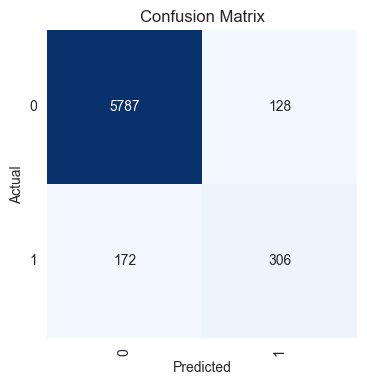

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.9711    0.9784    0.9747      5915
           1     0.7051    0.6402    0.6711       478

    accuracy                         0.9531      6393
   macro avg     0.8381    0.8093    0.8229      6393
weighted avg     0.9512    0.9531    0.9520      6393



In [33]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
 
# plot the confusion matrix
class_count = 2 
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(class_count)+.5, rotation=90)
plt.yticks(np.arange(class_count)+.5, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(y_test, y_pred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)


# The below process is to predict the labels on the test dataset

In [51]:
df_test = pd.read_csv(r"Z:\AAIT\NLP\tweeter/test.csv")

In [52]:
df_test.sample(n = 10).style.background_gradient(cmap = "GnBu")

,id,tweet
3561,35524,"all i have to do is submit my background check consent form, and i will have completed my application for my first guide dog ever."
11994,43957,looking to feel more #joy? join me and 20 speakers on the free summit #unleashyourjoy
11082,43045,@user #imissyou #quotes #qoute #him #hu daily_lovedose
13180,45143,ripsticking and listening to broadway musicals on this sunny day is about the best thing yet âï¸ðð
14831,46794,"sorry, no seat for you ! #naikskuter #vespa #cemburupunakutakberhak #beyourself"
7385,39348,one of my besties is coming to visit me in dallas this weekend!
11749,43712,do not waste even a day without a smile..! #smile #sun #everysmile #relax #collasso #ko
11302,43265,finally ordered my prom dress ðð
13019,44982,the #japanese who rejoice new #war law are handful nationalist and only #afp #guardian #nytimes #lemonde #reuters #independent #faz
6616,38579,ordered koko k from @user today and i can't wait to get it!!!!!! so happyâ¤ #kokok #kyliejenner #love


In [53]:
X_test_preprocessed = preprocess_text(df_test)

Letters are converted to lowecase, and punctuation marks, numbers and stopwords deleted succesfully


In [54]:
X_test_preprocessed.sample(n = 10).style.background_gradient(cmap = "GnBu")

,id,tweet
2585,34548,time quite happy see like bittersweat know thatslife
16347,48310,selfie lovely necklace â selfie smile love necklace day instahappyâ
5648,37611,digitala gorilla simulator need adapt environment need tear city mate
3813,35776,dr joan buccigrossi kicking morning corporate panel leadingtheway wepanforum user
2862,34825,user ice storm tree branch knocked scary
11667,43630,stone sandðððâïð step buddy nice vscom vscogood
65,32028,believe r willingness try understand encourage amp inspire others b amp grow greater spiritual purpose grok
4759,36722,today became adult bought le creuset pan amp vileda magic mop also couldnt happier
1335,33298,user feminismiscancer feminismisterrorism feminismmuktbharat malevote ignored user
1997,33960,model love u take u time urð ðððð ððð


In [55]:
x_test = X_test_preprocessed["tweet"]

In [60]:
x_test

0        studiolife aislife requires passion dedication...
1        user white supremacist want everyone see new â...
2         safe way heal acne altwaystoheal healthy healing
3        hp cursed child book reservation already yes ð...
4        rd bihday amazing hilarious nephew eli ahmir u...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

In [61]:
# Tokenize and pad the test data
X_test_sequences = tokenizer.texts_to_sequences(x_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_tweet_length)

# Predict the labels
y_test_pred_prob = model.predict(X_test_padded)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

538/538 [==============================] - 23s 42ms/step


In [62]:
print("Pridicted labels are\n", y_test_pred)

Pridicted labels are
 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
